In [6]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 


In [51]:
directory1 = '/n/home12/hongwei/HONGWEI/lagranto.ecmwf/run_settle_test'
filename1 = '/traj.1'

directory2 = '/n/home12/hongwei/HONGWEI/lagranto.settling/run_settle_test'
filename2 = '/traj.1'

In [58]:
file1 = open(directory1+filename1, 'r')
Lines1 = file1.readlines()

file2 = open(directory2+filename2, 'r')
Lines2 = file2.readlines()


N_head = 5 # first 5 lines are head lines, not include data
N_column = 4

N_parcel = 5

Nt = int( (len(Lines1)-4)/N_parcel - 1 ) # 2928

data1 = np.zeros((N_parcel, Nt, N_column))
data2 = np.zeros((N_parcel, Nt, N_column))


In [60]:
count = 0

# Strips the newline character
for line in tqdm(Lines1):
    count += 1
    
    if count>=5:
        i = count-5
        i_parcel = math.floor( i / (Nt+1) ) # Nt time lines plue 1 empty line
        i_t = i%(Nt+1)
        
        if i_t!=0:
            a = line.split()

            if i_t==1:
                if float(a[0])!=0.0: print('ERROR: first time is not 0 !!!')
            
            data1[i_parcel,i_t-1,1] = float(a[1]) # lon
            data1[i_parcel,i_t-1,2] = float(a[2]) # lat
            data1[i_parcel,i_t-1,3] = float(a[3]) # lev

100%|██████████| 1249/1249 [00:00<00:00, 142158.58it/s]


In [61]:
count = 0

# Strips the newline character
for line in tqdm(Lines2):
    count += 1
    
    if count>=5:
        i = count-5
        i_parcel = math.floor( i / (Nt+1) ) # Nt time lines plue 1 empty line
        i_t = i%(Nt+1)
        
        if i_t!=0:
            a = line.split()

            if i_t==1:
                if float(a[0])!=0.0: print('ERROR: first time is not 0 !!!')
            
            data2[i_parcel,i_t-1,1] = float(a[1]) # lon
            data2[i_parcel,i_t-1,2] = float(a[2]) # lat
            data2[i_parcel,i_t-1,3] = float(a[3]) # lev

100%|██████████| 1249/1249 [00:00<00:00, 190442.26it/s]


In [62]:
# a[0:4]:
# time, lon, lat, p
data1.shape

(5, 248, 4)

In [69]:
# plot

for i in tqdm(np.arange(0,Nt,1)):
    fig = plt.figure(figsize=(12,6), dpi=100)

    ax1 = fig.add_subplot(1,1,1, projection=crs.Robinson())
    ax1.set_global()
    ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
    ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
    ax1.gridlines()

    xx=data1[:,i,1]
    yy=data1[:,i,2]
    
    ax1.scatter(x=xx, y=yy,
            color="red",
            s=3,
            alpha=0.9,
            transform=crs.PlateCarree()) ## Important

    
    
    xx=data2[:,i,1]
    yy=data2[:,i,2]
    
    ax1.scatter(x=xx, y=yy,
            color="blue",
            s=3,
            alpha=0.9,
            transform=crs.PlateCarree()) ## Important
    
#     ax1.set_title(f'time: $(i*3) hour')


    plt.tight_layout()
    plt.savefig(str(i+1)+'_xy.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

100%|██████████| 248/248 [01:08<00:00,  3.62it/s]


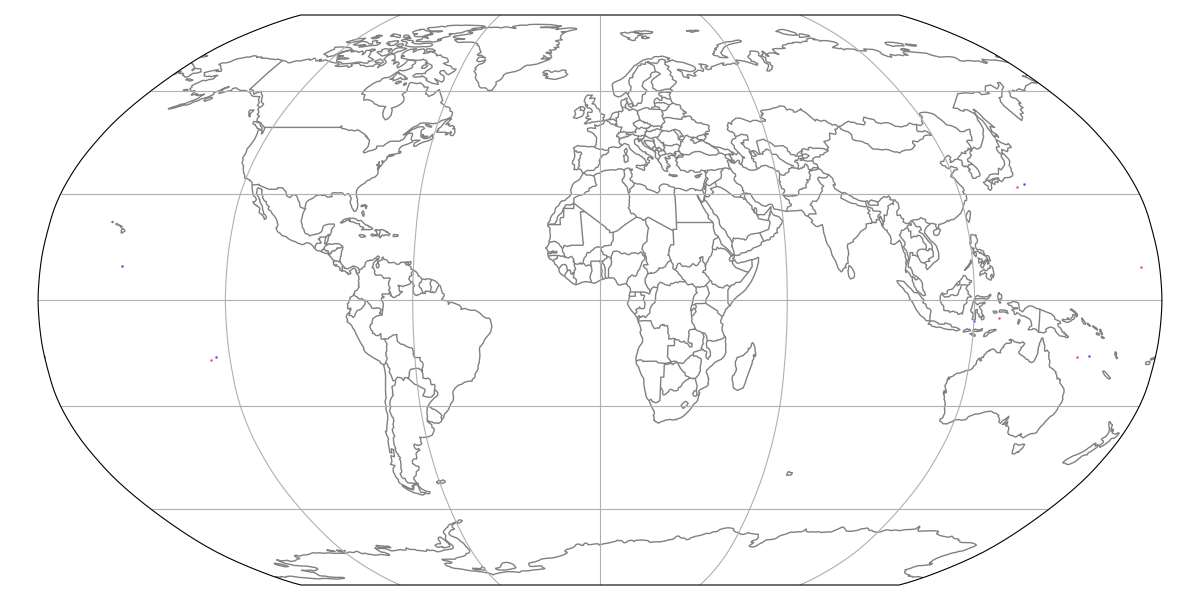

In [68]:

Image(filename=f'200_xy.png')

In [67]:
os.system('./png2gif2.sh')

0

array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8.69749003,
          9.32603347,   10.        ,   10.72267222,   11.49756995,
         12.32846739,   13.21941148,   14.17474163,   15.19911083,
         16.29750835,   17.475284  ,   18.73817423,   20.09233003,
         21.5443469 ,   23.101297  ,   24.77076356,   26.56087783,
         28.48035868,   30.53855509,   32.74549163,   35.11191734,
         37.64935807,   40.37017259,   43.28761281,   46.41588834,
         49.77023564,   53.36699231,   57.22367659,   61.35907

In [72]:

for i in tqdm(range( Nt )):
    
    
    # (1)
    fig = plt.figure(figsize=(12,6), dpi=100)
    gs = gridspec.GridSpec(1, 11, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0:11])

    
    
    # 25 hpa    
    xx4=data1[:,i,2].flatten()
    zz4=data1[:,i,3].flatten()
    
    ax1.scatter(x=xx4[:], y=zz4[:],
            color="red", label='No Settling',
            s=3) ## Important
        
    
    
    # 25 hpa    
    xx4=data2[:,i,2].flatten()
    zz4=data2[:,i,3].flatten()
    
    ax1.scatter(x=xx4[:], y=zz4[:],
            color="blue", label='Settling',
            s=3) ## Important
    
    
    
    
    
    ax1.set_xlim([-90,90])
    ax1.set_ylim([1, 1000])
    
    ax1.set_yscale('log')
    ax1.invert_yaxis()
    
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Pressure [hPa]')
    ax1.set_title('hour: ' + str(i))
    ax1.legend()
    
    
    
    plt.tight_layout()
    plt.savefig(str(i+1)+'_yz.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

100%|██████████| 248/248 [01:56<00:00,  2.14it/s]


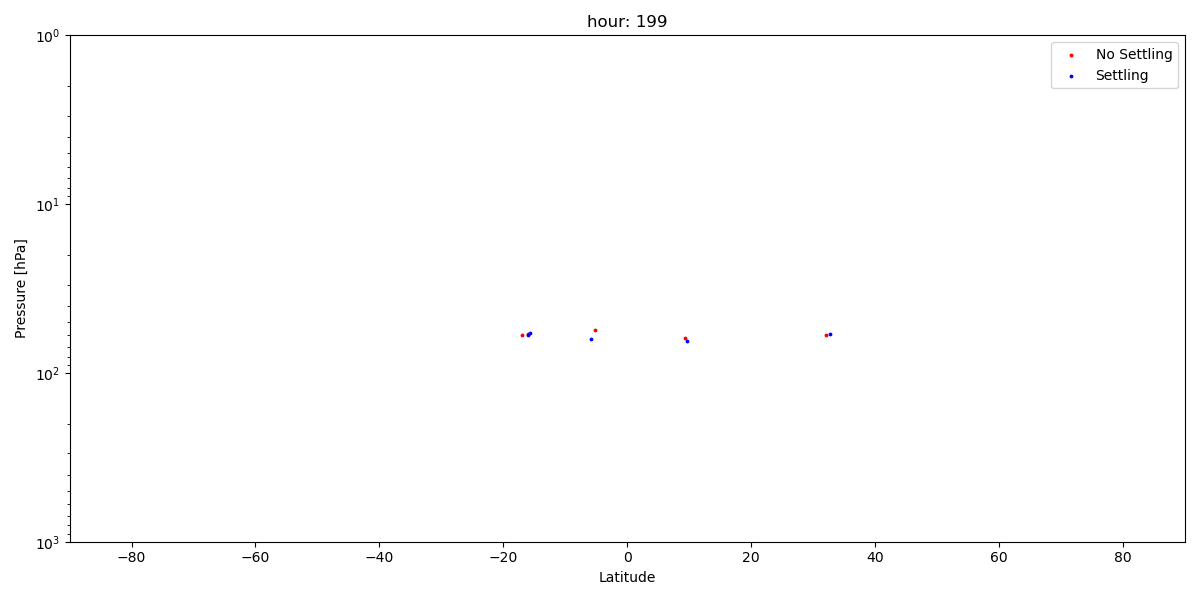

In [74]:
Image(filename=f'200_yz.png')

In [19]:
os.system('./png2gif2_yz.sh')

0

In [22]:
for i in range(3):
    for j in range(5):
        print(i,j)
        if j==4: break

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
